In [1]:
#Imports and setting up key
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as pltdates
from dotenv import load_dotenv
import os
import sys
from openaq import OpenAQ


module_dir = os.path.abspath(os.path.join(os.getcwd(), '..', 'data_collection'))
sys.path.insert(0, module_dir)
from air_quality import get_aq

In [2]:
# TODO: before re-running this cell, restart the kernel. Otherwise, runs into "Cannot send a request, as the client has been closed" error

load_dotenv()
key = os.getenv("OPENAQ_KEY")

now_utc = dt.datetime.now(dt.timezone.utc)
yesterday_utc = now_utc - dt.timedelta(hours=24)

df_aq_day = get_aq(yesterday_utc.strftime("%Y-%m-%dT%H:%M:%SZ"), key)
df_aq_day


,value,parameter_name,datetime_utc
0,7.4,pm25,2025-11-03T05:00:00Z
1,6.4,pm25,2025-11-03T06:00:00Z
2,5.8,pm25,2025-11-03T07:00:00Z
3,5.5,pm25,2025-11-03T08:00:00Z
4,5.1,pm25,2025-11-03T09:00:00Z
5,4.7,pm25,2025-11-03T10:00:00Z
6,4.6,pm25,2025-11-03T11:00:00Z
7,4.8,pm25,2025-11-03T12:00:00Z
8,4.9,pm25,2025-11-03T13:00:00Z
9,4.7,pm25,2025-11-03T14:00:00Z


In [3]:
df_aq_day.dtypes

value             float64
parameter_name     object
datetime_utc       object
dtype: object

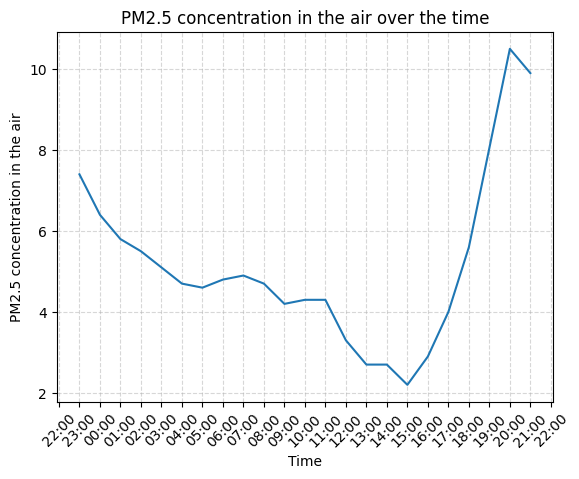

In [8]:
df_aq_day['datetime_utc'] = pd.to_datetime(df_aq_day['datetime_utc'], utc=True)
# df_aq_day['timestamp'] = df_aq_day['datetime_utc'].dt.tz_convert('America/Chicago')

df_aq_day['timestamp'] = df_aq_day['datetime_utc'].dt.tz_convert('America/Chicago').dt.tz_localize(None)


plt.plot(df_aq_day['timestamp'], df_aq_day['value'])
plt.xticks(rotation = 45)
plt.xlabel("Time")
plt.ylabel("PM2.5 concentration in the air")
plt.title("PM2.5 concentration in the air over the time")
plt.gca().xaxis.set_major_locator(pltdates.HourLocator(interval=1))   # every 1 hour
plt.gca().xaxis.set_major_formatter(pltdates.DateFormatter('%H:%M'))  # display hour:minute
plt.grid(True, which='both', linestyle='--', alpha=0.5)